In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn. metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn as sns; sns.set()
from sklearn.externals import joblib
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
%matplotlib inline

#custom functions
def NSC(y_pred,y_true):
    """
    Nash-Sutcliffe Coefficient
    """
    return 1 - sum((y_pred-y_true)**2)/sum((y_true-np.mean(y_true))**2)

def corr(data1, data2):
    "data1 & data2 should be numpy arrays."
    mean1 = data1.mean() 
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()

#     corr = ((data1-mean1)*(data2-mean2)).mean()/(std1*std2)
    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
#Load dataframes
dir_data = '../data/Features/'

Potohar_HR_Features = pd.read_excel(dir_data + 'Potohar_HR_Features.xlsx')
Potohar_HR_Features = Potohar_HR_Features.fillna(0)
Potohar_HR_Features.name ='Potohar_HR_Features'


In [3]:
#For all features sets, the most significant p<0.05 features are used
#all features developed using python seed from other models randomseed(42)

In [4]:
#Make a dataframe of step models first____ features
Features_SF = ['WK_14_Minweekly_C','WK_15_Meanweekly_SM_0_10cm', 'JanandMar_below8mmhr', 
                 'MinMonth_Season_STemp_0_10cm']

Features_RF = ['WK_14_Minweekly_SM_0_10cm','WK_15_Minweekly_SM_0_10cm','WK_16_Minweekly_SM_0_10cm',
                  'WK_13_Maxweekly_SM_0_10cm', 'WK_14_weekly_STemp_Hrsabove_10C','WK_24_weekly_STemp_Hrsabove_10C',
                  'WK_16_weekly_STemp_Hrsabove_10C', 'Feb_Minmonthly_SM_0_10cm','Jan_Maxmonthly_SM_10_40cm',
                  'MaxMonth_Season_Precip_mm','Season_Summonthly_Precip_mm','Mean_Monthly_Precip_mm']
                
#Take top features from categories top performing models
Features_MARS = ['WK_11_Minweekly_C','WK_14_Minweekly_C','WK_15_Minweekly_C',
                'WK_18_Minweekly_C','WK_22_Meanweekly_C','WK_10_Maxweekly_C',
                'WK_23_Maxweekly_C','Mean_Monthly_Precip_mm','MaxMonth_Season_Precip_mm',
                'Feb_Meanmonthly_SM_0_10cm','WK_14_Minweekly_STemp_0_10cm','WK_23_Minweekly_STemp_0_10cm']

In [5]:
#Combined Season Weekly and Monthly data
Features={
    'Features_SF':Features_SF, 
'Features_RF':Features_RF,
'Features_MARS':Features_MARS ,
}


features =[
     'Features_SF', 'Features_RF','Features_MARS' 
]

In [6]:
  #Model classification as a function of target and data input
#This model designated to work only with Potohar Wheat Features!!!!!!!!!!!!!!!
def Direct_Out(features): 
    global dir_out
    global directory
    directory = '../output/Final/MVLR'
    
     
    if features == Features_SF:
        dir_out = directory + '/Features_SF/'    
    elif features == Features_RF:
        dir_out = directory + '/Features_RF/'
    elif features ==Features_MARS:
        dir_out = directory + '/Features_MARS/'
   
        
    return (dir_out)


In [7]:
#create a dataframe to display the Statistics of model
Model_ResultsReference = pd.DataFrame()


#create a dataframe to display the Statistics of model
def stats(data,features,target, y_test, y_pred):
    Accuracy = pd.DataFrame()
    Accuracy['Dataframe'] = [data]
    Accuracy['Feature'] = [j] #This is set up to put correct feature name while using for loop model runs
    Accuracy['Target'] = [target]
    Accuracy['mean_absolute_error'] = [mean_absolute_error(y_test, y_pred)]
    Accuracy['RMSE'] = [np.sqrt(mean_squared_error(y_test, y_pred))] # compute the RMSE of predictions
    Accuracy['r^2'] = [r2_score(y_test, y_pred)]
    Accuracy['NS'] = [NSC(y_pred,y_test)]
    Accuracy['MSE'] = [mean_squared_error(y_test, y_pred)]
    Accuracy['MAPE']= [mean_absolute_percentage_error(y_test, y_pred)]
    Accuracy['Correlation'] = [corr(y_pred, y_test)]
    return Accuracy

In [10]:
#Model classification as a function of target and data input
#This model designated to work only with Potohar Wheat Features Jhe removed!!!!!!!!!!!!!!! Potohar_HR_Features_Norm
#Uses Weekly data
def MLR_PW_HR_Features_Norm(target, features, data):
   
    global Model_ResultsReference
    global dir_out
    global directory

    directory = '../output/Final/MVLR'
    Resultsdirectory = '../output/Final/MVLR'
    
    dir_out = Direct_Out(features)
    df = data
  
    X = df[features]
    y = df[target]
  
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state =42)
    
    linreg = LassoCV(cv=10, random_state=42,copy_X=True, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False,
    positive=False, precompute='auto',  selection='cyclic',
    tol=0.0001, verbose=False).fit(X_train, y_train)
    
    clf_best = linreg.fit(X_train,y_train)
  
    print (df.name)
    print(j)
    print (target)
    print (clf_best)
    
     #predict using the best model
    y_pred = clf_best.predict(X_test)
    
    #Statistics
    RMSE= np.sqrt(mean_squared_error(y_test, y_pred)) # compute the RMSE of predictions
    r2= r2_score(y_test, y_pred)  
    MAE =  [mean_absolute_error(y_test, y_pred)]
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    NS = NSC(y_pred,y_test)
    Cor = corr(y_pred, y_test)
    Model_ResultsReference = Model_ResultsReference.append(stats('Potohar_Wheat_Features',j,target, y_test, y_pred))
    Model_ResultsReference.to_csv(Resultsdirectory + 'Model_ResultsMVLRstep.csv')
    MAPE = mean_absolute_percentage_error(y_test, y_pred)

  
  #print the accuracy score and feature importance
    print ("Coefficients are:", linreg.coef_)
    print ("intercept is:", linreg.intercept_)
    print ("Parameters are:", linreg.get_params())
    #print("Accuracy is", Accuracy)
    print("RMSE is:", RMSE)
    print("R2 is:", r2)
    print("NS is", NS)
    print("Correlation is", Cor)
    print('MAPE is', MAPE)
  

    #Save to file  
    d_out = X_test.copy()
    d_out['predicted '+ target] = clf_best.predict(X_test)
   # d_out['training (yes/no)'] = 0
    #d_out['training (yes/no)'].loc[X_train.index] = 1
    d_out['y_test'] = y_test
    d_out['y_pred'] = y_pred
    
    
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    y_test = np.sort(y_test)
    y_pred = np.sort(y_pred)
    
    Analysis = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
  
    file_var = dir_out + ' ' + dir_data[8:-1]
    
    d_out.to_csv(dir_out+ j + 'DataWithPredictedValues.csv')
    #Accuracy.to_csv(file_var + ' Accuracy.csv')
    joblib.dump(clf_best, file_var + 'BestEstimator.pkl') 
    Analysis.to_csv(file_var + 'Analysis')

  #Plot the results

     #Plot the results
    r = 'R^2 = '
    c = 'R = '
    m = 'MAPE ='
    #plt.close()
    f,a = plt.subplots()
    a.plot(y_test, label = 'Test Data '+ target)
    a.plot(y_pred, label = 'Predicted '+ target)
    a.grid()
    a.title.set_text('PM_HR_Features' + target+j)
    a.set_ylabel(target)
    a.legend()
    a.annotate((r,r2), xy = (8,1), xytext = (8, 1))
    a.annotate((c,Cor), xy = (8,0.7), xytext = (8, 0.7))
    a.annotate((m,MAPE), xy = (8,0.5), xytext = (10, 0.5))
    a.set_xlim(left = 0, right = len(y_pred))
    a.set_ylim(bottom = -1, top = y_test.max()+1)
    f.set_size_inches([8,5])
   

Potohar_HR_Features
Features_SF
Wheat_ton_ha
LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False,
    positive=False, precompute='auto', random_state=42, selection='cyclic',
    tol=0.0001, verbose=False)
Coefficients are: [0.0568789  0.02500189 0.00647944 0.09885423]
intercept is: 0.18093052520011788
Parameters are: {'alphas': None, 'copy_X': True, 'cv': 5, 'eps': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'n_alphas': 100, 'n_jobs': -1, 'normalize': False, 'positive': False, 'precompute': 'auto', 'random_state': 42, 'selection': 'cyclic', 'tol': 0.0001, 'verbose': False}
RMSE is: 0.17832888313205975
R2 is: 0.810461488955985
NS is 0.8104614889559849
Correlation is 0.8752203334754497
MAPE is 9.935129354169188
Potohar_HR_Features
Features_RF
Wheat_ton_ha
LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False,
    positive=False, p

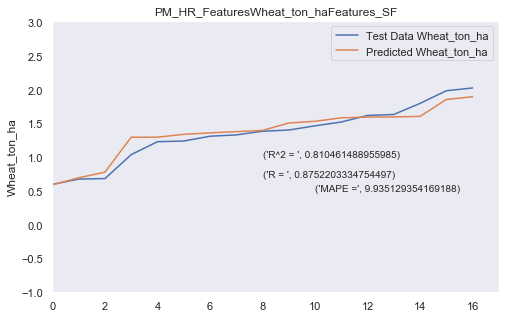

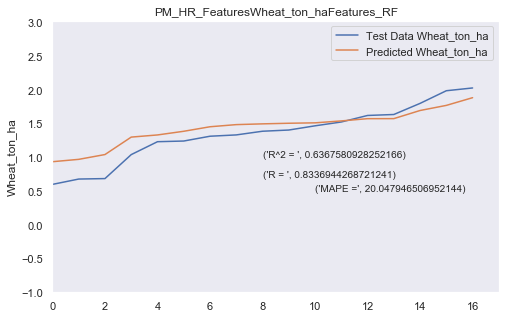

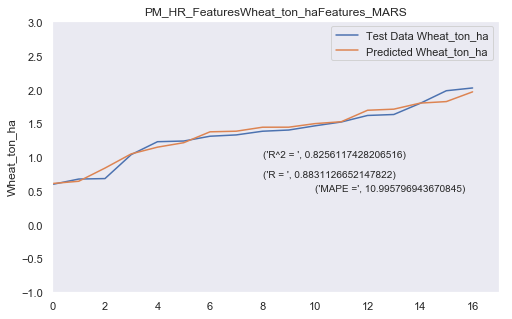

In [9]:
#Top model results, V3
#run model
for j in features:
    MLR_PW_HR_Features_Norm('Wheat_ton_ha', Features[j], Potohar_HR_Features)

Potohar_HR_Features
Features_SF
Wheat_ton_ha
LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False,
    positive=False, precompute='auto', random_state=42, selection='cyclic',
    tol=0.0001, verbose=False)
Coefficients are: [0.0568789  0.02500189 0.00647944 0.09885423]
intercept is: 0.18093052520011788
Parameters are: {'alphas': None, 'copy_X': True, 'cv': 10, 'eps': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'n_alphas': 100, 'n_jobs': -1, 'normalize': False, 'positive': False, 'precompute': 'auto', 'random_state': 42, 'selection': 'cyclic', 'tol': 0.0001, 'verbose': False}
RMSE is: 0.17832888313205975
R2 is: 0.810461488955985
NS is 0.8104614889559849
Correlation is 0.8752203334754497
MAPE is 9.935129354169188
Potohar_HR_Features
Features_RF
Wheat_ton_ha
LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False,
    positive=False

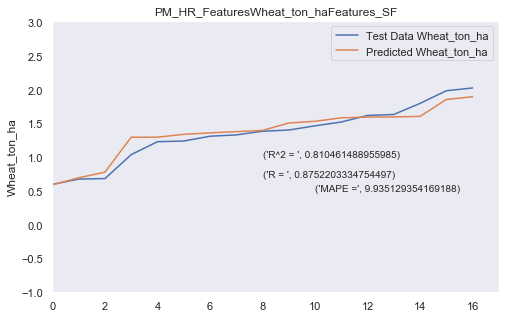

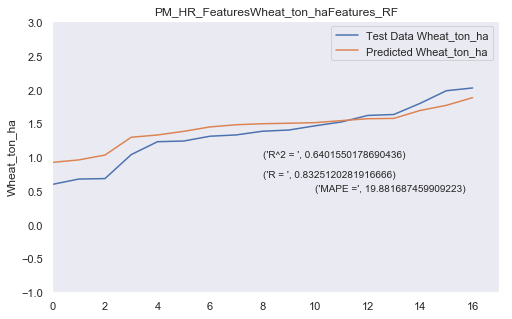

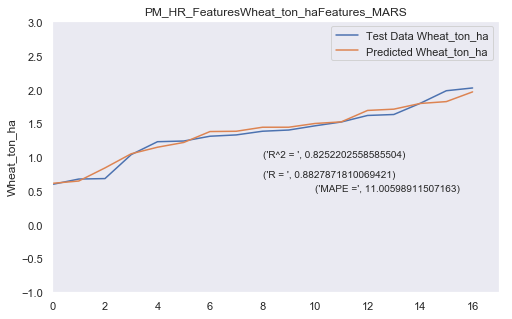

In [11]:
#Top model results, 10 fold CV
#run model
for j in features:
    MLR_PW_HR_Features_Norm('Wheat_ton_ha', Features[j], Potohar_HR_Features)